### Climate Change Belief Analysis
by Classification_JS4_DSFT21
Introduction
Several companies are built around lessening one’s environmental impact or carbon footprint. This is because they offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, we have created a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data. This model together will the accompanying app will help Geo-Environmental Consultation companies who are turning to social media to obtain valuable information about job applicants and to monitor the activities of their employees in relation to the values they have towards the company's projects and beliefs surrounding the ever changing global environment.

#### Problem Statement 

Sentiment analysis refers to identifying as well as classifying the sentiments that are expressed in the text source. Tweets are often useful in generating vast amounts of sentiment upon data analysis. These data are useful in undestanding the opinion of the people about a variety of topics. We therefore developed a Machine Learning Model that can identify whether or not a person believes in climate change. This information can be used to better understand how people feel about the topic and can assist companies and governments to make informed decisions about marketing campaigns and policy implementation. 

### Approach to analyse various Sentiments

1. Exploratory Data Analysis

2. Data Preprocessing

3. Vectorization

4. Classification Models

5. Evaluation

6. Conclusion

#### Import libraries and datasets

In [1]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200) 
import string
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
#from gensim.models.deprecated.doc2vec import LabeledSentence
from gensim.models.doc2vec import TaggedDocument
import gensim
from sklearn.linear_model import LogisticRegression
from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

print("All libraries imported successfully!")

C:\Users\malef\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


All libraries imported successfully!


#### Loading our dataset

We will be loading the train csv file using pandas. For this, we will be using read_csv file

In [2]:
df = pd.read_csv("train.csv")
len(df)

15819

#### Basic Data Exploration

In this step, we will perform the below operations to check what the data set consists of. We will check the below things:

- head of the dataset
- the shape of the dataset
- info of the dataset
- summary of the dataset

1. The head function will give us the top records in the data set. By default, it will show you the top 5 records.


2. The shape attribute tells us a number of observations and variables we have in the data set. It is used to check the dimension of data. The train data set has 15819 observations and 3 variables in the data set.

In [97]:
df.head()

,sentiment,message,tweetid,original_message
0,1,polyscimajor epa chief doesn think carbon dioxid main caus global warm and wait what,625221,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via"
1,1,not like lack evid anthropogen global warm,126103,It's not like we lack evidence of anthropogenic global warming
2,2,rawstori research say have three year act climat chang befor too late,698562,RT : Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…
3,1,#todayinmaker# wire wa pivot year the war climat chang,573736,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD
4,1,soynoviodetoda and racist sexist climat chang deni bigot lead the poll #electionnight,466954,"RT : It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight"


From the table above, we observe that the tweets are divided into 4 different classes:

- [2] News: Tweets related to fuctual news about climate change
- [1] Pro: Tweets that support the belief about man-made climate change
- [0] Neutral: Tweets that neither support nor refuse beliefs about climate change
- [-1] Anti: Tweets that do not support the belief of man-made climate change

####  info() is used to check the infomation about the data and the datatypes of each respective attribute

In [100]:
# There are null values in location column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sentiment         15819 non-null  int64 
 1   message           15819 non-null  object
 2   tweetid           15819 non-null  int64 
 3   original_message  15819 non-null  object
dtypes: int64(2), object(2)
memory usage: 494.5+ KB


Looking at the data in the head function and in info, we know that the variables sentiment and tweetid are of int64 datatype and message is of the object datatype

In [101]:
df.shape

(15819, 4)

#### The describe method will help to see how data has been spread for numerical values. We can clearly see the minimum value, mean values, different percentile values, and maximum values

In [102]:
df.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


In [103]:
df['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

#### Now, lets visualise the unique values in each Feature Column

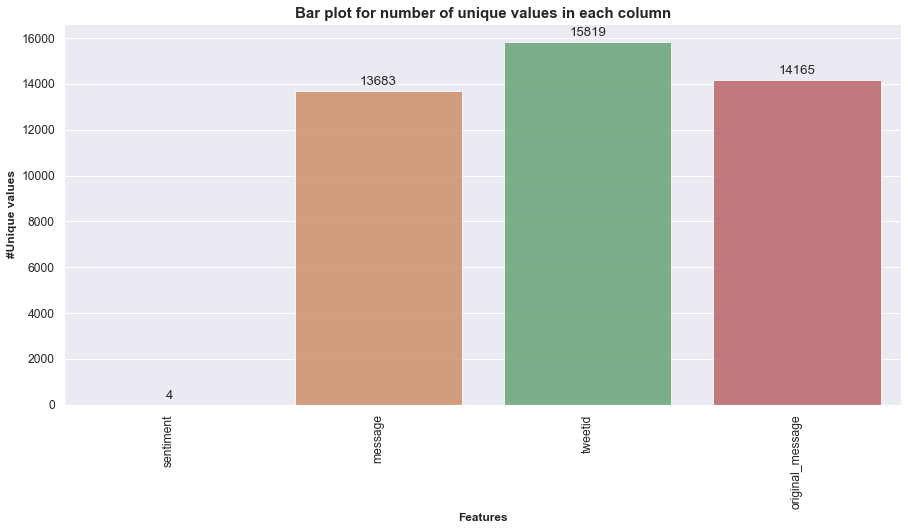

In [104]:
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

#### Lets create a visual to look at the target variable distribution, a sentiment countplot

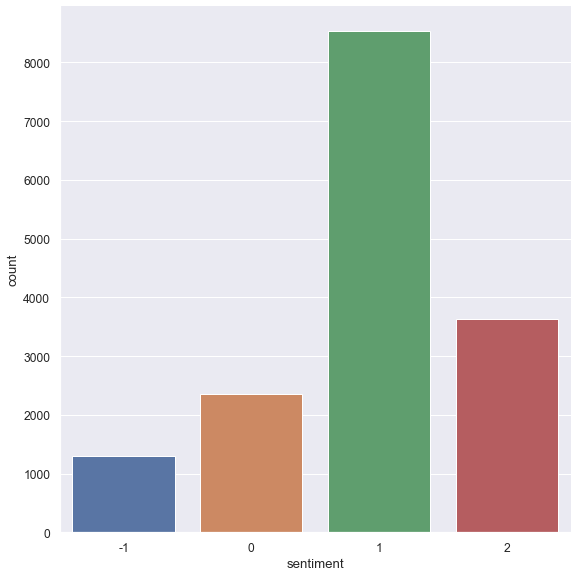

In [105]:
sns.set(font_scale=1.1)
sns.catplot("sentiment", data=df, kind="count", height=8)

It is evident that the data is hugely imbalanced with an overwhelming majority of tweets falling in the "pro" category that supports the belief of man-made climate change

### Feature Extraction

The objective of the this step is to ensure that the data input (which is the called the corpus in Natural Language Processing) to the model is in the most useful form: one that facilitates the extraction of “maximum” information. In order to do this, the following were carried out:

- Removal of punctuation (” “) from each sentence in the predictor variable.
- Retain only alphabetic words i.e. exclude numbers and alphanumeric letters.
- Removal of common English stop words. Stop words are basically words whose presence do not alter the meaning of a    sentence.
- Eliminating all one-lettered words e.g a, I
- Converting all of the words to lower case for consistency.

In [106]:
# write function for removing @user

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [107]:
# create new column with removed @user

df['original_message'] = np.vectorize(remove_pattern)(df['message'], '@[\w]*')

##### Now we inspect  rows before after change has been implemented

In [108]:
df.tail(5)

,sentiment,message,tweetid,original_message
15814,1,ezlusztig they took down the materi global warm lgbt right and health care but now they hock melania qvc,22001,ezlusztig they took down the materi global warm lgbt right and health care but now they hock melania qvc
15815,2,washingtonpost how climat chang could break million year old relationship,17856,washingtonpost how climat chang could break million year old relationship
15816,0,notiven nytimesworld what doe trump actual believ about climat chang rick perri join other aid,384248,notiven nytimesworld what doe trump actual believ about climat chang rick perri join other aid
15817,-1,sara smile hey liber the climat chang crap hoax that tie #agenda the climat be chang,819732,sara smile hey liber the climat chang crap hoax that tie #agenda the climat be chang
15818,0,chet cannon kurteichenwald climat chang equat screenshot,806319,chet cannon kurteichenwald climat chang equat screenshot


##### Removing http and urls from tweets

In [109]:
import re
df['message'] = df['message'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

##### We check three rows below to see if http and url were removed

In [110]:
df.head(3)

,sentiment,message,tweetid,original_message
0,1,polyscimajor epa chief doesn think carbon dioxid main caus global warm and wait what,625221,polyscimajor epa chief doesn think carbon dioxid main caus global warm and wait what
1,1,not like lack evid anthropogen global warm,126103,not like lack evid anthropogen global warm
2,2,rawstori research say have three year act climat chang befor too late,698562,rawstori research say have three year act climat chang befor too late


##### Removing punctuations,numbers and special characters

In [111]:
df['message'] = df['message'].str.replace('[^a-zA-Z#]+',' ')

In [112]:
df.tail(10)

,sentiment,message,tweetid,original_message
15809,2,the quest captur and store carbon and slow climat chang just reach new mileston,705048,the quest captur and store carbon and slow climat chang just reach new mileston
15810,0,thi global warm late the season pretti annoy,572819,thi global warm late the season pretti annoy
15811,1,stephenschlegel she think about how she go die becaus your husband doesn believ climat chang,426353,stephenschlegel she think about how she go die becaus your husband doesn believ climat chang
15812,1,sierraclub hottest year histori also member congress deni climat chang real,989478,sierraclub hottest year histori also member congress deni climat chang real
15813,1,thinkprogress epa head fals claim carbon emiss aren the caus global warm,442853,thinkprogress epa head fals claim carbon emiss aren the caus global warm
15814,1,ezlusztig they took down the materi global warm lgbt right and health care but now they hock melania qvc,22001,ezlusztig they took down the materi global warm lgbt right and health care but now they hock melania qvc
15815,2,washingtonpost how climat chang could break million year old relationship,17856,washingtonpost how climat chang could break million year old relationship
15816,0,notiven nytimesworld what doe trump actual believ about climat chang rick perri join other aid,384248,notiven nytimesworld what doe trump actual believ about climat chang rick perri join other aid
15817,-1,sara smile hey liber the climat chang crap hoax that tie #agenda the climat be chang,819732,sara smile hey liber the climat chang crap hoax that tie #agenda the climat be chang
15818,0,chet cannon kurteichenwald climat chang equat screenshot,806319,chet cannon kurteichenwald climat chang equat screenshot


#### Remove short words

In [113]:
df['message'] = df['message'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [114]:
df.head(2)

,sentiment,message,tweetid,original_message
0,1,polyscimajor epa chief doesn think carbon dioxid main caus global warm and wait what,625221,polyscimajor epa chief doesn think carbon dioxid main caus global warm and wait what
1,1,not like lack evid anthropogen global warm,126103,not like lack evid anthropogen global warm


#### Also, we need to remove stop words from tweets. Stop words are those words in natural language that have very little meaning, such as “is”, “an”, “the”, etc. To remove stop words from a sentence, you can divide your text into words and then remove the word if it exists in the list of stop words provided by NLTK.


#### Then we need to normalize tweets by using Stemming or Lemmatization. “Stemming” is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “ed”, “s” etc) from a word. For example — “play”, “player”, “played”, “plays” and “playing” are the different variations of the word — “play”.


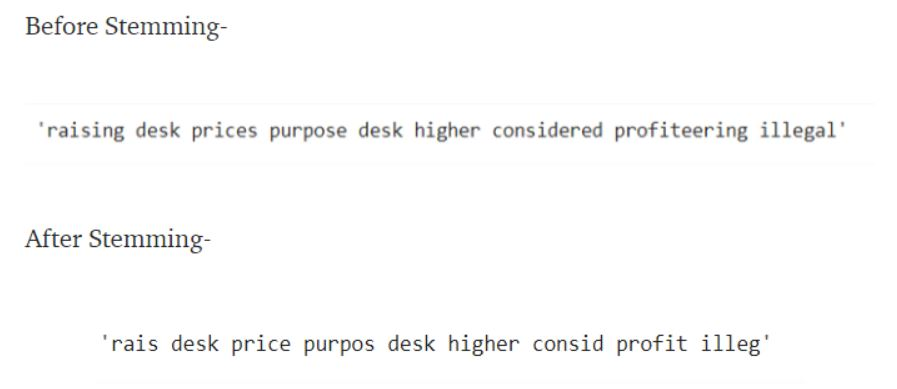

In [115]:
# create new variable tokenized tweet 

tokenized_tweet = df['message'].apply(lambda x: x.split())

In [116]:
df.head(6)

,sentiment,message,tweetid,original_message
0,1,polyscimajor epa chief doesn think carbon dioxid main caus global warm and wait what,625221,polyscimajor epa chief doesn think carbon dioxid main caus global warm and wait what
1,1,not like lack evid anthropogen global warm,126103,not like lack evid anthropogen global warm
2,2,rawstori research say have three year act climat chang befor too late,698562,rawstori research say have three year act climat chang befor too late
3,1,#todayinmaker# wire pivot year the war climat chang,573736,#todayinmaker# wire wa pivot year the war climat chang
4,1,soynoviodetoda and racist sexist climat chang deni bigot lead the poll #electionnight,466954,soynoviodetoda and racist sexist climat chang deni bigot lead the poll #electionnight
5,1,worth read whether you don believ climat chang,425577,worth read whether you don believ climat chang


In [117]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [118]:
df.head(2)

,sentiment,message,tweetid,original_message
0,1,polyscimajor epa chief doesn think carbon dioxid main caus global warm and wait what,625221,polyscimajor epa chief doesn think carbon dioxid main caus global warm and wait what
1,1,not like lack evid anthropogen global warm,126103,not like lack evid anthropogen global warm


In [119]:
# join tokens into one sentence

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

# change df['Tweet'] to tokenized_tweet

In [120]:
df['message']  = tokenized_tweet

In [121]:
df.head(2)

,sentiment,message,tweetid,original_message
0,1,polyscimajor epa chief doesn think carbon dioxid main cau global warm and wait what,625221,polyscimajor epa chief doesn think carbon dioxid main caus global warm and wait what
1,1,not like lack evid anthropogen global warm,126103,not like lack evid anthropogen global warm


In [122]:
df.head(2)

,sentiment,message,tweetid,original_message
0,1,polyscimajor epa chief doesn think carbon dioxid main cau global warm and wait what,625221,polyscimajor epa chief doesn think carbon dioxid main caus global warm and wait what
1,1,not like lack evid anthropogen global warm,126103,not like lack evid anthropogen global warm


### Story Generation and Visualization from Tweets

- What are the most common words in the entire dataset?

- What are the most common words in the dataset for negative and positive tweets, respectively?

- How many hashtags are there in a tweet?

- Which trends are associated our my dataset?

- Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

#### Create text from all tweets

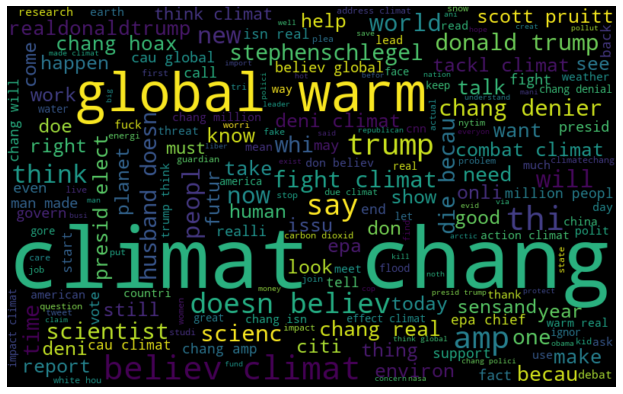

In [123]:
all_words = ' '.join([text for text in df['message']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(20, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Create text of pro-climate change buzzwords

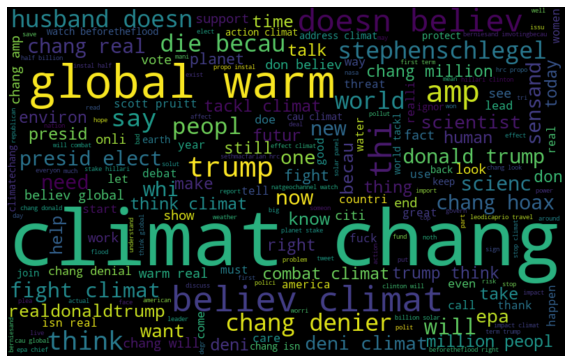

In [124]:
normal_words = ' '.join([text for text in df['message'][df['sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Create text from anti-climate change buzzwords

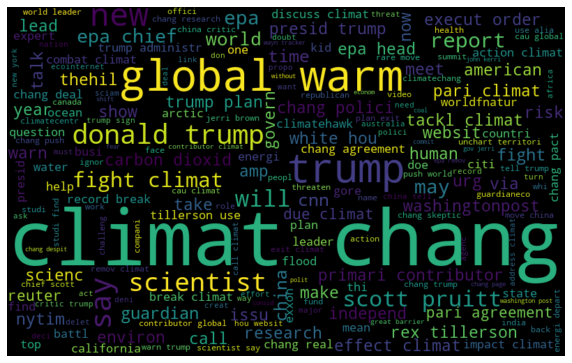

In [125]:
normal_words = ' '.join([text for text in df['message'][df['sentiment'] == 2]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Create text from neutral buzzwords

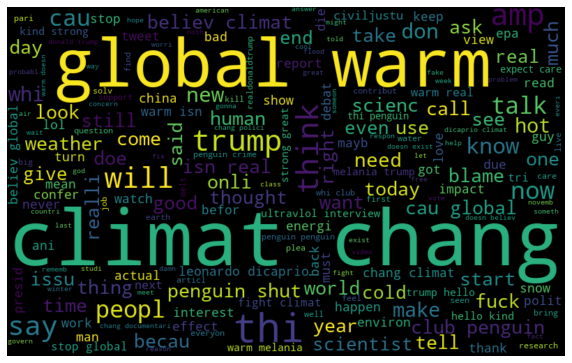

In [126]:
normal_words = ' '.join([text for text in df['message'][df['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Create text from news buzzwords

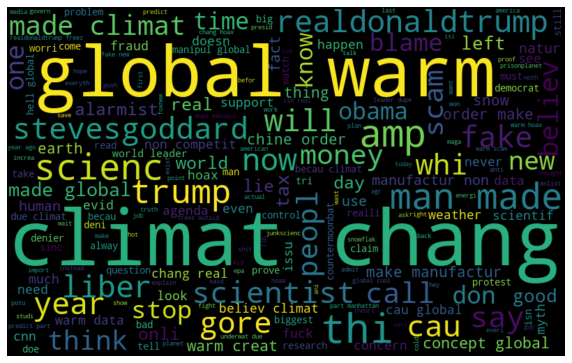

In [127]:
normal_words = ' '.join([text for text in df['message'][df['sentiment'] == -1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Making sense of the WordClouds

- The words "climate change" and "global warming" are found in all the classes. This is to be expected.
- The word "RT" which is short for retweet comes across both the pro and anti classes. This means that lots of the tweets has been shared / retweeted between people
- Observe the difference in tone between the pro and anti classes. There is a positive tone or sentiment in the pro class vs a negative tone or sentiment in the anti class.
- The word "Trump" features prominently in all classes - one wonders why


#### Hashtags 

Hashtags have long been an important tool on Twitter for helping users organize and sort their tweets. They're a great way to indicate that your content is relevant to a certain topic and to get your tweets in front of an interested audience.

Considering this, we decided it might be insightful to see what the most frequent hashtags in each class are. This will help us gain a better understanding of what kind of information is being consumed and shared in each class.

In [129]:
# function to collect hashtags

def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags

In [136]:
# extracting hashtags from the tweets

HT_Positive = hashtag_extract(df['original_message'][df['sentiment'] == 1])
HT_Negative = hashtag_extract(df['original_message'][df['sentiment'] == 2])
HT_Neutral = hashtag_extract(df['original_message'][df['sentiment'] == 0])
HT_Negative = hashtag_extract(df['original_message'][df['sentiment'] == -1])



# unnesting list
HT_Positive = sum(HT_Positive, [])
HT_Negative = sum(HT_Negative, [])
HT_Neutral = sum(HT_Neutral, [])
HT_Negative = sum(HT_Negative, [])

TypeError: can only concatenate list (not "str") to list

In [137]:
print(HT_Positive)

['todayinmaker', 'electionnight', 'climatemarch', 'saveourplanet', 'obamaunc', 'cdnpoli', 'johnholdren', 'demforc', 'theresist', 'uniteblu', 'imvotingbecaus', 'womansmarch', 'resist', 'impeach', 'beforetheflood', 'srhpl', 'climat', 'fishermen', 'earthday', 'marchforsci', 'healthandclim', 'beforetheflood', 'worldveganday', 'avhack', 'art', 'larsenc', 'climatechangeart', 'sdg', 'climat', 'exxonknew', 'exxonknew', 'hrc', 'childrenright', 'cop', 'health', 'fit', 'imvotingbecaus', 'pollutingpruitt', 'climatefact', 'climat', 'citi', 'govern', 'parisagr', 'globalcoven', 'citi', 'cop', 'ocean', 'climatechang', 'nodapl', 'fool', 'parisagr', 'ff', 'trump', 'corrupt', 'epa', 'climat', 'fossil', 'donaldtrump', 'nhlamemb', 'latinoprior', 'ivotedbecaus', 'renew', 'standup', 'globalgo', 'parisagr', 'beforetheflood', 'davo', 'wef', 'environ', 'climat', 'mediterranean', 'makeinindia', 'climatevot', 'beforetheflood', 'climat', 'epa', 'climat', 'denverclimatemarch', 'exxon', 'rextillerson', 'progress', '

#### Lets make a frequencey distribution of the top 10 Pro-Climate change hashtags

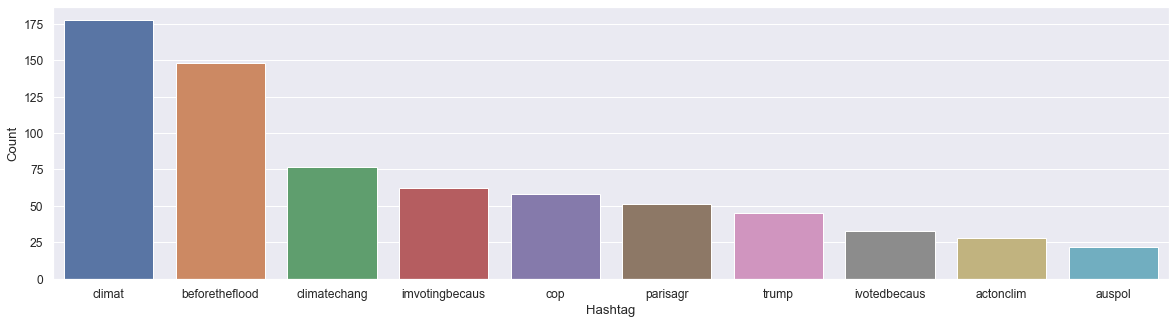

In [138]:
a = nltk.FreqDist(HT_Positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (20,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

#### Lets make a frequencey distribution of the top 10 Anti-Climate change hashtags

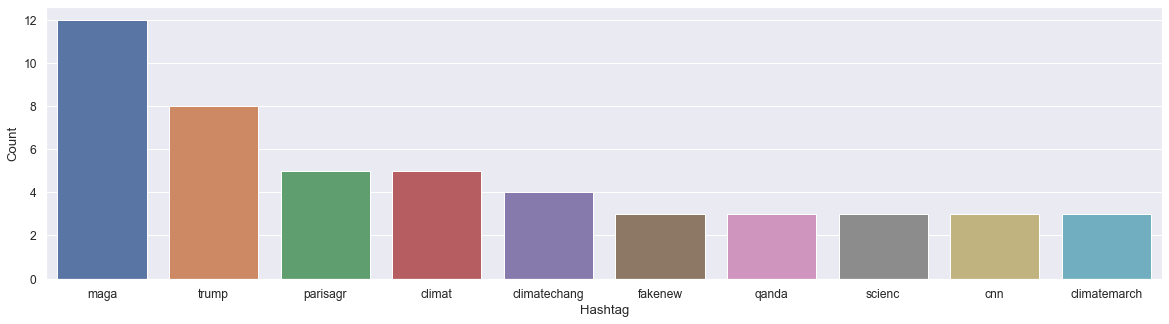

In [139]:
a = nltk.FreqDist(HT_Negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (20,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

#### Extracting Features from cleaned tweets

In [140]:
new_df = df[['message','sentiment']]
len(new_df)

15819

In [141]:
new_df.head()

,message,sentiment
0,polyscimajor epa chief doesn think carbon dioxid main cau global warm and wait what,1
1,not like lack evid anthropogen global warm,1
2,rawstori research say have three year act climat chang befor too late,2
3,#todayinmaker# wire pivot year the war climat chang,1
4,soynoviodetoda and racist sexist climat chang deni bigot lead the poll #electionnight,1


In [142]:
df['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

#### Converting to lower case

In [143]:
new_df["message"] = new_df["message"].str.lower()#.str.split()

In [144]:
new_df.head(5)

,message,sentiment
0,polyscimajor epa chief doesn think carbon dioxid main cau global warm and wait what,1
1,not like lack evid anthropogen global warm,1
2,rawstori research say have three year act climat chang befor too late,2
3,#todayinmaker# wire pivot year the war climat chang,1
4,soynoviodetoda and racist sexist climat chang deni bigot lead the poll #electionnight,1


#### Removing Stopwords

In [145]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\malef\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [146]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [147]:
#Here we are going to tokenize, so we split the string by space, otherwise you get every character not every word
#so you need to add this .split()
#we need to combine the tokens again after we removed the stopwords
#We can join a list of strings like this
'---'.join(["Tyrone", "Euler"])

'Tyrone---Euler'

In [148]:
msg_no_stopwords = new_df['message'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
msg_no_stopwords

0                 polyscimajor epa chief think carbon dioxid main cau global warm wait
1                                               like lack evid anthropogen global warm
2                         rawstori research say three year act climat chang befor late
3                                      #todayinmaker# wire pivot year war climat chang
4        soynoviodetoda racist sexist climat chang deni bigot lead poll #electionnight
                                             ...                                      
15814        ezlusztig took materi global warm lgbt right health care hock melania qvc
15815            washingtonpost climat chang could break million year old relationship
15816    notiven nytimesworld doe trump actual believ climat chang rick perri join aid
15817             sara smile hey liber climat chang crap hoax tie #agenda climat chang
15818                         chet cannon kurteichenwald climat chang equat screenshot
Name: message, Length: 15819, dtype: object

In [149]:
# now we need to assign the results to the dataframe

new_df = new_df.assign(message=msg_no_stopwords)

In [150]:
new_df.head(6)

,message,sentiment
0,polyscimajor epa chief think carbon dioxid main cau global warm wait,1
1,like lack evid anthropogen global warm,1
2,rawstori research say three year act climat chang befor late,2
3,#todayinmaker# wire pivot year war climat chang,1
4,soynoviodetoda racist sexist climat chang deni bigot lead poll #electionnight,1
5,worth read whether believ climat chang,1


In [151]:
new_df.shape

(15819, 2)

In [152]:
new_df.isnull().sum()

message      0
sentiment    0
dtype: int64

In [153]:
new_df.head(7)

,message,sentiment
0,polyscimajor epa chief think carbon dioxid main cau global warm wait,1
1,like lack evid anthropogen global warm,1
2,rawstori research say three year act climat chang befor late,2
3,#todayinmaker# wire pivot year war climat chang,1
4,soynoviodetoda racist sexist climat chang deni bigot lead poll #electionnight,1
5,worth read whether believ climat chang,1
6,thenat mike penc believ global warm smoke cau lung cancer,1


### Splitting Our Dataset into Training And Testing Dataset(for MultiClass Classification)

In [154]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(new_df,test_size = 0.33,random_state=1234,stratify = new_df.sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (10598, 2)
valid shape :  (5221, 2)


### Use of Counter Vectorizer For Multi Class Classification

In [155]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))

# by specifying the stopwords list to CountVectorizer, the previous steps of manually removing stopwords could be skipped
# sklearn is doing it for us in the background :)

vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.message.values)
X_valid = vectorizer.transform(valid.message.values)

y_train = train.sentiment.values
y_valid = valid.sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (10598, 13521)
X_train.shape :  (5221, 13521)
y_train.shape :  (10598,)
y_valid.shape :  (5221,)


### Naive Bayes Classifier for MULTICLASS Classification

In [156]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_f1 = f1_score(y_valid,NB_prediction, average="macro")
print("training f1 Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation f1 Score : ",NB_f1 )
print(classification_report(NB_prediction,y_valid))

training f1 Score    :  0.8393093036421967
Validation f1 Score :  0.5659783653710859
              precision    recall  f1-score   support

          -1       0.32      0.85      0.46       158
           0       0.21      0.66      0.32       251
           1       0.90      0.69      0.78      3669
           2       0.68      0.72      0.70      1143

    accuracy                           0.70      5221
   macro avg       0.53      0.73      0.57      5221
weighted avg       0.80      0.70      0.73      5221



### Stochastic Gradient Descent-SGD Classifier( MULTICLASS CLASSIFICATION)

In [157]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_f1 = f1_score(y_valid,sgd_prediction, average="macro")
print("Training f1 Score    : ",sgd_clf.score(X_train,y_train))
print("Validation f1 Score : ",sgd_f1 )
print(classification_report(sgd_prediction,y_valid))

Training f1 Score    :  0.970843555387809
Validation f1 Score :  0.6198774517139187
              precision    recall  f1-score   support

          -1       0.48      0.67      0.56       303
           0       0.38      0.52      0.44       561
           1       0.81      0.76      0.78      3011
           2       0.75      0.67      0.70      1346

    accuracy                           0.70      5221
   macro avg       0.60      0.65      0.62      5221
weighted avg       0.73      0.70      0.71      5221



### RANDOM FOREST CLASSIFIER (For Multiclass Classification)

In [158]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_f1 = f1_score(y_valid,rf_prediction, average="macro")
print("Training f1 Score    : ",rf_clf.score(X_train,y_train))
print("Validation f1 Score : ",rf_f1 )
print(classification_report(rf_prediction,y_valid))

Training f1 Score    :  0.9984902811851293
Validation f1 Score :  0.5908518230730488
              precision    recall  f1-score   support

          -1       0.30      0.80      0.44       161
           0       0.40      0.54      0.46       580
           1       0.83      0.73      0.78      3230
           2       0.70      0.68      0.69      1250

    accuracy                           0.70      5221
   macro avg       0.56      0.69      0.59      5221
weighted avg       0.74      0.70      0.71      5221



### Extreme Gradient Boosting ( For Multiclass Classification)

In [159]:
#takes huge amount of time to execute

import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_f1 = f1_score(y_valid,xgb_prediction, average="macro")
print("Training f1 Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation f1 Score : ",xgb_f1 )
print(classification_report(xgb_prediction,y_valid))

[22:02:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training f1 Score    :  0.7745801094546141
Validation f1 Score :  0.5838450483901692
              precision    recall  f1-score   support

          -1       0.39      0.81      0.53       207
           0       0.28      0.60      0.38       364
           1       0.89      0.69      0.78      3605
           2       0.61      0.70      0.65      1045

    accuracy                           0.69      5221
   macro avg       0.54      0.70      0.58      5221
weighted avg       0.77      0.69      0.71      5221



### Support vector machine( For Multiclass Classification)

In [160]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_f1 = f1_score(y_valid,svc_prediction, average="macro")
print("Training f1 Score    : ",svc.score(X_train,y_train))
print("Validation f1 Score : ",svc_f1 )
print(classification_report(svc_prediction,y_valid))

Training f1 Score    :  0.9005472730703906
Validation f1 Score :  0.5867244110988501
              precision    recall  f1-score   support

          -1       0.30      0.91      0.46       143
           0       0.30      0.61      0.40       378
           1       0.88      0.71      0.79      3475
           2       0.71      0.70      0.71      1225

    accuracy                           0.71      5221
   macro avg       0.55      0.73      0.59      5221
weighted avg       0.78      0.71      0.73      5221



### Logistic Regression(For Multiclass Classification)

In [161]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_f1 = f1_score(y_valid,logreg_prediction, average="macro")
print("Training f1 Score    : ",logreg.score(X_train,y_train))
print("Validation f1 Score : ",logreg_f1 )
print(classification_report(logreg_prediction,y_valid))

Training f1 Score    :  0.9562181543687488
Validation f1 Score :  0.6368076456248831
              precision    recall  f1-score   support

          -1       0.47      0.76      0.58       264
           0       0.39      0.55      0.46       555
           1       0.83      0.75      0.79      3139
           2       0.74      0.71      0.72      1263

    accuracy                           0.72      5221
   macro avg       0.61      0.69      0.64      5221
weighted avg       0.75      0.72      0.73      5221



### CATBOOST MODEL (For Multiclass Classification)

In [162]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import f1_score

In [163]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,  
        eval_set=(X_valid, y_valid), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


In [164]:
catboost_prediction = clf2.predict(X_valid)
catboost_f1 = f1_score(y_valid,catboost_prediction, average="macro")
print("Training f1 Score    : ",clf2.score(X_train,y_train))
print("Validation f1 Score : ",catboost_f1 )
print(classification_report(catboost_prediction,y_valid))

Training f1 Score    :  0.7219286657859973
Validation f1 Score :  0.5474331754796211
              precision    recall  f1-score   support

          -1       0.35      0.87      0.50       173
           0       0.19      0.61      0.29       249
           1       0.90      0.66      0.76      3838
           2       0.57      0.71      0.63       961

    accuracy                           0.68      5221
   macro avg       0.50      0.71      0.55      5221
weighted avg       0.79      0.68      0.71      5221



### All the multiclass models test accuracy in descending order

In [165]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'],
    'Test f1': [svc_f1, logreg_f1, 
              rf_f1, NB_f1, 
              sgd_f1, xgb_f1,catboost_f1]})

models.sort_values(by='Test f1', ascending=False)

,Model,Test f1
1,Logistic Regression,0.636808
4,Stochastic Gradient Decent,0.619877
2,Random Forest,0.590852
0,Support Vector Machines,0.586724
5,XGBoost,0.583845
3,Naive Bayes,0.565978
6,CatBoost,0.547433


### CONVRTING OUR MULTICLASS CLASSIFICATION INTO BINARY CLASSIFICATION¶

In [169]:
new_df.head()

,message,sentiment
0,polyscimajor epa chief think carbon dioxid main cau global warm wait,1
1,like lack evid anthropogen global warm,1
2,rawstori research say three year act climat chang befor late,2
3,#todayinmaker# wire pivot year war climat chang,1
4,soynoviodetoda racist sexist climat chang deni bigot lead poll #electionnight,1


In [170]:
CATBOOST = new_df[['message','sentiment']]

In [171]:
CATBOOST.head(2)

,message,sentiment
0,polyscimajor epa chief think carbon dioxid main cau global warm wait,1
1,like lack evid anthropogen global warm,1


In [172]:
CATBOOST["sentiment"]= CATBOOST["sentiment"].replace('Positive',1) 
CATBOOST["sentiment"]= CATBOOST["sentiment"].replace('Neutral',1) 
CATBOOST["sentiment"]= CATBOOST["sentiment"].replace('Negative',2) 
CATBOOST["sentiment"]= CATBOOST["sentiment"].replace('Extremely_Negative',2)

In [173]:
CATBOOST.head(2)

,message,sentiment
0,polyscimajor epa chief think carbon dioxid main cau global warm wait,1
1,like lack evid anthropogen global warm,1


In [174]:
CATBOOST['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [175]:
X = CATBOOST.drop('sentiment', axis=1)
y = CATBOOST.sentiment

In [176]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\malef\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [177]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [178]:
# AMMAR: Same problem as above. but again, you don't really need that step, CountVectorizer would handle it for you
CATBOOST['message'].apply(lambda x: [item for item in x if item not in stop])

0                                   [p, l, c, j, r,  , e, p,  , c, h, e, f,  , h, n, k,  , c, r, b, n,  , x,  , n,  , c, u,  , g, l, b, l,  , w, r,  , w]
1                                                                          [l, k, e,  , l, c, k,  , e, v,  , n, h, r, p, g, e, n,  , g, l, b, l,  , w, r]
2                                         [r, w, r,  , r, e, e, r, c, h,  ,  , h, r, e, e,  , e, r,  , c,  , c, l,  , c, h, n, g,  , b, e, f, r,  , l, e]
3                                                                       [#, n, k, e, r, #,  , w, r, e,  , p, v,  , e, r,  , w, r,  , c, l,  , c, h, n, g]
4                                [n, v, e,  , r, c,  , e, x,  , c, l,  , c, h, n, g,  , e, n,  , b, g,  , l, e,  , p, l, l,  , #, e, l, e, c, n, n, g, h]
                                                                               ...                                                                       
15814    [e, z, l, u, z, g,  , k,  , e, r,  , g, l, b, l,  , w, r,  , l, g, 

In [179]:
CATBOOST.head(2)

,message,sentiment
0,polyscimajor epa chief think carbon dioxid main cau global warm wait,1
1,like lack evid anthropogen global warm,1


### DIVIDING OUR DATASET INTO TRAINING AND TESTING¶

In [4]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(CATBOOST,test_size = 0.33,random_state=0,stratify = CATBOOST.sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

NameError: name 'CATBOOST' is not defined

### USING COUNT VECTORIZER

In [181]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.message.values)
X_valid = vectorizer.transform(valid.message.values)

y_train = train.sentiment.values
y_valid = valid.sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (10598, 13534)
X_train.shape :  (5221, 13534)
y_train.shape :  (10598,)
y_valid.shape :  (5221,)


### NAIVE BAYES CLASSIFIER FOR BINARY CLASSIFICATION

In [182]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_f1 = f1_score(y_valid,NB_prediction, average="macro")
print("training f1 Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation f1 Score : ",NB_f1 )
print(classification_report(NB_prediction,y_valid))

training f1 Score    :  0.8359124363087375
Validation f1 Score :  0.5339613309048045
              precision    recall  f1-score   support

          -1       0.23      0.80      0.35       121
           0       0.21      0.66      0.32       247
           1       0.91      0.67      0.78      3808
           2       0.64      0.74      0.69      1045

    accuracy                           0.69      5221
   macro avg       0.50      0.72      0.53      5221
weighted avg       0.81      0.69      0.73      5221



### RANDOM FOREST CLASSIFIER FOR BINARY CLASSIFICATION

In [183]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_f1 = f1_score(y_valid,rf_prediction, average="macro")
print("Training f1 Score    : ",rf_clf.score(X_train,y_train))
print("Validation f1 Score : ",rf_f1 )
print(classification_report(rf_prediction,y_valid))

Training f1 Score    :  0.9973579920739762
Validation f1 Score :  0.5721387071069899
              precision    recall  f1-score   support

          -1       0.26      0.70      0.38       159
           0       0.35      0.60      0.44       461
           1       0.86      0.71      0.78      3423
           2       0.68      0.70      0.69      1178

    accuracy                           0.69      5221
   macro avg       0.54      0.67      0.57      5221
weighted avg       0.76      0.69      0.72      5221



### LOGISTIC REGRESSION(BINARY CLASSIFICATION)

In [184]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_f1 = f1_score(y_valid,logreg_prediction, average="macro")
print("Training f1 Score    : ",logreg.score(X_train,y_train))
print("Validation f1 Score : ",logreg_f1 )
print(classification_report(logreg_prediction,y_valid))

Training f1 Score    :  0.9580109454614079
Validation f1 Score :  0.6086554627212042
              precision    recall  f1-score   support

          -1       0.39      0.69      0.50       238
           0       0.37      0.54      0.44       524
           1       0.85      0.74      0.79      3240
           2       0.72      0.71      0.71      1219

    accuracy                           0.71      5221
   macro avg       0.58      0.67      0.61      5221
weighted avg       0.75      0.71      0.72      5221



### CATBOOST ALGORITHM FOR BINARY CLASSIFICATION

In [185]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,  
        eval_set=(X_valid, y_valid), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


### XG BOOST( BINARY CLASSIFICATION)

In [186]:
#takes huge amount of time to execute

import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_f1 = f1_score(y_valid,xgb_prediction, average="macro")
print("Training f1 Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation f1 Score : ",xgb_f1 )
print(classification_report(xgb_prediction,y_valid))

[22:43:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training f1 Score    :  0.7728816757878845
Validation f1 Score :  0.5730888428591241
              precision    recall  f1-score   support

          -1       0.35      0.74      0.47       202
           0       0.29      0.65      0.40       341
           1       0.89      0.68      0.77      3676
           2       0.59      0.71      0.65      1002

    accuracy                           0.69      5221
   macro avg       0.53      0.70      0.57      5221
weighted avg       0.77      0.69      0.71      5221



### SUPPORT VECTOR MACHINE(BINARY CLASSIFICATION)

In [187]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_f1 = f1_score(y_valid,svc_prediction, average="macro")
print("Training f1 Score    : ",svc.score(X_train,y_train))
print("Validation f1 Score : ",svc_f1 )
print(classification_report(svc_prediction,y_valid))

Training f1 Score    :  0.8978109077184374
Validation f1 Score :  0.5644077387861847
              precision    recall  f1-score   support

          -1       0.23      0.83      0.36       118
           0       0.29      0.66      0.41       346
           1       0.90      0.70      0.79      3627
           2       0.68      0.73      0.70      1130

    accuracy                           0.71      5221
   macro avg       0.53      0.73      0.56      5221
weighted avg       0.80      0.71      0.73      5221



In [188]:
# just copy-pasting this part again for the new version of the data

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_f1 = f1_score(y_valid,sgd_prediction, average="macro")
print("Training f1 Score    : ",sgd_clf.score(X_train,y_train))
print("Validation f1 Score : ",sgd_f1 )
print(classification_report(sgd_prediction,y_valid))

Training f1 Score    :  0.9722589167767504
Validation f1 Score :  0.6158291102138961
              precision    recall  f1-score   support

          -1       0.43      0.66      0.52       282
           0       0.41      0.50      0.45       637
           1       0.82      0.76      0.79      3054
           2       0.71      0.69      0.70      1248

    accuracy                           0.70      5221
   macro avg       0.60      0.65      0.62      5221
weighted avg       0.73      0.70      0.71      5221



In [189]:
train_class_preds = sgd_clf.predict(X_train)
test_class_preds = sgd_clf.predict(X_valid)

[[ 830    7   26    5]
 [   1 1501   60   14]
 [   4   26 5619   66]
 [   0    2   83 2354]]


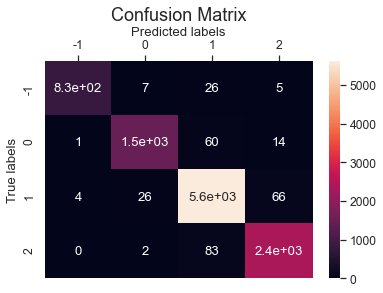

In [190]:
# Get the confusion matrix for both train and test. We are getting very low type and type 2 errors.

labels = sorted(set(y_train))
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix', fontsize=18)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
# It is nice also to put the xticklabels at top for a confusion matrix

ax.xaxis.set_label_position('top') 
ax.xaxis.tick_top()

In [191]:
# Let's check the overall f1. Overall f1 is very good.

from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

y_pred = sgd_clf.predict(X_valid)

score =f1_score(y_valid,y_pred, average="macro")
print('f1 is', score)

f1 is 0.6158291102138961


In [192]:
# F1 score for our classifier

from sklearn.metrics import f1_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


y_pred =  sgd_clf.predict(X_valid)
print(f1_score(y_valid,y_pred, average="macro"))

0.6158291102138961


In [193]:
#score is mean f1

scikit_score = sgd_clf.score(X_valid,y_valid)
print('scikit score:', scikit_score)

scikit score: 0.7042712124114154


In [194]:
# Recall score for our winner model

recall_score(y_valid, y_pred, average='macro')

0.5951576544679243

In [195]:
# Classification Report for our stochastic gradient descent algorithm

print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

          -1       0.66      0.43      0.52       428
           0       0.50      0.41      0.45       777
           1       0.76      0.82      0.79      2815
           2       0.69      0.71      0.70      1201

    accuracy                           0.70      5221
   macro avg       0.65      0.60      0.62      5221
weighted avg       0.70      0.70      0.70      5221



In [196]:
# Very low type 1 and type 2 error

confusion_matrix(y_valid,y_pred)

array([[ 186,   72,  139,   31],
       [  36,  318,  332,   91],
       [  43,  189, 2315,  268],
       [  17,   58,  268,  858]], dtype=int64)

In [197]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'],
    'Test f1': [svc_f1, logreg_f1, 
              rf_f1, NB_f1, 
              sgd_f1, xgb_f1,catboost_f1]})

models.sort_values(by='Test f1', ascending=False)

,Model,Test f1
4,Stochastic Gradient Decent,0.615829
1,Logistic Regression,0.608655
5,XGBoost,0.573089
2,Random Forest,0.572139
0,Support Vector Machines,0.564408
6,CatBoost,0.547433
3,Naive Bayes,0.533961


Seems like Logistic Regression is the best model here, so we train it and use it to predict the sentiments of the testing examples.

In [198]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test_with_no_labels.csv")
vectorizer = CountVectorizer(decode_error = 'replace',stop_words=stop).fit(train.message)

X_train = vectorizer.transform(train.message)
y_train = train.sentiment
X_test = vectorizer.transform(test.message)
print(X_train.shape, X_test.shape)

(15819, 31765) (10546, 31765)


In [199]:
clf= LogisticRegression()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
submission  = pd.DataFrame({"tweetid": test.tweetid, "sentiment":predictions})
submission

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1
...,...,...
10541,895714,1
10542,875167,1
10543,78329,2
10544,867455,0


### Conclusion 

We generated a classification report to provide some metrics. These metrics are the precision, recall, and F1 score. 
- Precision: Of all rows we predicted to be a certain class, how many did we correctly predict?
- Recall: Of all rows of a certain class, how many did we correctly predict?
- F1 score: Harmonic mean of Precision and Recall.

After training and testing, the performance of the Logistic Regression model was found to perform the best and thus it is the one that we used for deployment. We predicted sentiment scores (pro and anti)on the data set and it most of the tweets support the belief of man-made climate change. Sentiment analysis is often tricky in that even if the model peforms well by some benchmark, the final performance will have to be left to "human" judges which are hard to quantify.

### Further work

The project defintely has some room for improvement. While we believe our model has done some learning, we can do much better by perhaps tweaking the model's parameters, and exploring other algorithms. The possibilities for experimentation do exist and it would be interesting to see the results.

### Acknowledgements - without them, this work would not be possible!!

- R, A. (2018). APPLYING RANDOM FOREST (CLASSIFICATION) — MACHINE LEARNING ALGORITHM FROM SCRATCH WITH REAL…. [online] Medium. Available at: https://medium.com/@ar.ingenious/applying-random-forest-classification-machine-learning-algorithm-from-scratch-with-real-24ff198a1c57 [Accessed 18 Jun. 2020].


- NLTK Tokenize: Words and Sentences Tokenizer with Example. Available at : https://www.guru99.com/tokenize-words-sentences-nltk.html


- Wahome, R.(2015). This Is How Twitter Sees The World : Sentiment Analysis. Available at : https://towardsdatascience.com/the-real-world-as-seen-on-twitter-sentiment-analysis-part-one-5ac2d06b63fb



- Analytics Vidhya (2019). 6 Easy Steps to Learn Naive Bayes Algorithm (with code in Python). [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/.



- Chauhan, A.(2018). Scraping tweets and analyzing Social Sentiments. Available at : https://towardsdatascience.com/selenium-tweepy-to-scrap-tweets-from-tweeter-and-analysing-sentiments-1804db3478ac


- Swatimeena (2020). Beginners guide for text preprocessing in NLP. Available at : https://swatimeena989.medium.com/beginners-guide-for-preprocessing-text-data-f3156bec85ca#c479